## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
title_ratings = pd.read_csv('imdb.title.ratings.csv.gz')
title_basics = pd.read_csv('imdb.title.basics.csv.gz')
title_akas = pd.read_csv('imdb.title.akas.csv.gz')

In [3]:
#setting index for joining
title_ratings.set_index('tconst', inplace = True)
title_ratings.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [4]:
#setting index for joing
title_basics.set_index('tconst', inplace =True)
title_basics.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
#renamed title_id to tconst to join this data frame into our main data frame
title_akas.rename(columns={'title_id':'tconst'}, inplace=True)
title_akas.set_index('tconst', inplace=True)
title_akas.head()

,ordering,title,region,language,types,attributes,is_original_title
tconst,,,,,,,
tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [6]:
#completed first join between title_ratings and title_basics
merged1 = title_ratings.join(title_basics, on='tconst', how='inner')
merged1.head()

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,,,
tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [7]:
#completed second join between the above result and title_akas
imdb_data = merged1.join(title_akas, on='tconst', how='inner')
imdb_data['region'].value_counts()

US     30194
XWW    15267
RU     12924
DE      9608
FR      8414
       ...  
CG         1
VC         1
PF         1
TO         1
BJ         1
Name: region, Length: 196, dtype: int64

In [8]:
#Since there are lots of missing data and irrelevant data, the data is filtered with only US region
imdb_US_movie = imdb_data[imdb_data['region'] == 'US']
imdb_US_movie.shape

(30194, 14)

In [9]:
#sorted in descending order
imdb_US_movie = imdb_US_movie.sort_values(by=['numvotes'], ascending=False)
imdb_US_movie

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title
tconst,,,,,,,,,,,,,,
tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8,Inception,US,en,NaN,NaN,0.0
tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",24,Inception,US,NaN,imdbDisplay,NaN,0.0
tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",30,Oliver's Arrow,US,NaN,NaN,fake working title,0.0
tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",42,Inception: The IMAX Experience,US,NaN,NaN,IMAX version,0.0
tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",9,Magnus Rex,US,NaN,NaN,fake working title,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt1779356,6.0,5,Blind People,Blind People,2010,90.0,Drama,1,Blind People,US,NaN,NaN,NaN,0.0
tt6505002,4.0,5,GONE,GONE,2017,NaN,"Mystery,Thriller",1,GONE,US,NaN,NaN,NaN,0.0
tt6071314,7.8,5,Chevron vs. The Amazon,Chevron vs. The Amazon,2016,68.0,Documentary,1,Chevron vs. The Amazon,US,NaN,NaN,NaN,0.0


In [10]:
#dropped all the duplicate titles from the dataframe
imdb_US_movie.drop_duplicates(subset=['original_title'], keep ='first', inplace =True)
imdb_US_movie

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title
tconst,,,,,,,,,,,,,,
tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8,Inception,US,en,NaN,NaN,0.0
tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",9,Magnus Rex,US,NaN,NaN,fake working title,0.0
tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",2,Interstellar,US,en,NaN,NaN,0.0
tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",11,Django Unchained,US,NaN,imdbDisplay,NaN,0.0
tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",39,Marvel's The Avengers,US,NaN,NaN,complete title,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt1779356,6.0,5,Blind People,Blind People,2010,90.0,Drama,1,Blind People,US,NaN,NaN,NaN,0.0
tt6505002,4.0,5,GONE,GONE,2017,NaN,"Mystery,Thriller",1,GONE,US,NaN,NaN,NaN,0.0
tt6071314,7.8,5,Chevron vs. The Amazon,Chevron vs. The Amazon,2016,68.0,Documentary,1,Chevron vs. The Amazon,US,NaN,NaN,NaN,0.0


In [11]:
#filtered out relevant columns in our dataframe
#setting the index to title
imdb_US_movie.set_index('primary_title', inplace=True)
imdb_US_movie = imdb_US_movie[['averagerating', 'numvotes', 'start_year', 'runtime_minutes', 'genres']]
imdb_US_movie

,averagerating,numvotes,start_year,runtime_minutes,genres
primary_title,,,,,
Inception,8.8,1841066,2010,148.0,"Action,Adventure,Sci-Fi"
The Dark Knight Rises,8.4,1387769,2012,164.0,"Action,Thriller"
Interstellar,8.6,1299334,2014,169.0,"Adventure,Drama,Sci-Fi"
Django Unchained,8.4,1211405,2012,165.0,"Drama,Western"
The Avengers,8.1,1183655,2012,143.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...
Blind People,6.0,5,2010,90.0,Drama
GONE,4.0,5,2017,NaN,"Mystery,Thriller"
Chevron vs. The Amazon,7.8,5,2016,68.0,Documentary


In [12]:
mean = imdb_US_movie['numvotes'].mean()
median = imdb_US_movie['numvotes'].median()
print(f'mean is {mean} and median is {median}')

mean is 8626.783681653427 and median is 67.0


In [13]:
imdb_US_movie.dropna(subset=['runtime_minutes','genres'], inplace=True)

<ipython-input-13-d410da236a9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_US_movie.dropna(subset=['runtime_minutes','genres'], inplace=True)


In [14]:
imdb_US_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23959 entries, Inception to Fast Talk
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   averagerating    23959 non-null  float64
 1   numvotes         23959 non-null  int64  
 2   start_year       23959 non-null  int64  
 3   runtime_minutes  23959 non-null  float64
 4   genres           23959 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.1+ MB


In [15]:
imdb_US_movie['numvotes'].quantile(.99)

231731.4999999961

In [16]:
top_25percent = imdb_US_movie[(imdb_US_movie['numvotes']>=669)]

In [17]:
top_10percent = imdb_US_movie[(imdb_US_movie['numvotes']>=7048)]

In [18]:
top_1percent = imdb_US_movie[(imdb_US_movie['numvotes']>=231731)]

In [19]:
top_1percent.head()

,averagerating,numvotes,start_year,runtime_minutes,genres
primary_title,,,,,
Inception,8.8,1841066,2010,148.0,"Action,Adventure,Sci-Fi"
The Dark Knight Rises,8.4,1387769,2012,164.0,"Action,Thriller"
Interstellar,8.6,1299334,2014,169.0,"Adventure,Drama,Sci-Fi"
Django Unchained,8.4,1211405,2012,165.0,"Drama,Western"
The Avengers,8.1,1183655,2012,143.0,"Action,Adventure,Sci-Fi"


In [20]:
top_1percent['genres'].value_counts()

Action,Adventure,Sci-Fi       37
Action,Adventure,Fantasy      15
Action,Adventure,Comedy       11
Adventure,Animation,Comedy    10
Action,Adventure,Thriller      9
                              ..
Comedy,Mystery                 1
Mystery,Thriller               1
Comedy,Fantasy,Romance         1
Comedy,Music,Romance           1
Drama,Sport                    1
Name: genres, Length: 89, dtype: int64

In [21]:
top_1percent['genres'] = top_1percent['genres'].str.split(',')

<ipython-input-21-72b13b3733da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1percent['genres'] = top_1percent['genres'].str.split(',')


In [22]:
top_1percent

,averagerating,numvotes,start_year,runtime_minutes,genres
primary_title,,,,,
Inception,8.8,1841066,2010,148.0,"[Action, Adventure, Sci-Fi]"
The Dark Knight Rises,8.4,1387769,2012,164.0,"[Action, Thriller]"
Interstellar,8.6,1299334,2014,169.0,"[Adventure, Drama, Sci-Fi]"
Django Unchained,8.4,1211405,2012,165.0,"[Drama, Western]"
The Avengers,8.1,1183655,2012,143.0,"[Action, Adventure, Sci-Fi]"
...,...,...,...,...,...
Non-Stop,7.0,234717,2014,106.0,"[Action, Mystery, Thriller]"
Dredd,7.1,234616,2012,95.0,"[Action, Crime, Sci-Fi]"
Terminator Genisys,6.4,234615,2015,126.0,"[Action, Adventure, Sci-Fi]"


In [23]:
top_1percent = top_1percent.explode('genres')

In [24]:
top_1percent

,averagerating,numvotes,start_year,runtime_minutes,genres
primary_title,,,,,
Inception,8.8,1841066,2010,148.0,Action
Inception,8.8,1841066,2010,148.0,Adventure
Inception,8.8,1841066,2010,148.0,Sci-Fi
The Dark Knight Rises,8.4,1387769,2012,164.0,Action
The Dark Knight Rises,8.4,1387769,2012,164.0,Thriller
...,...,...,...,...,...
Mission: Impossible - Fallout,7.8,233877,2018,147.0,Adventure
Mission: Impossible - Fallout,7.8,233877,2018,147.0,Thriller
The Accountant,7.3,233022,2016,128.0,Action


In [25]:
top_1percent['genres'].value_counts()

Action       128
Adventure    116
Drama         89
Sci-Fi        59
Comedy        56
Thriller      45
Crime         34
Fantasy       31
Mystery       24
Biography     20
Romance       15
Animation     15
Horror         9
Family         9
History        6
Music          5
Sport          3
Musical        2
Western        2
War            2
Name: genres, dtype: int64

In [26]:
genre_vote = top_1percent[['genres','numvotes']]
genre_vote.reset_index(inplace=True)
genre_vote.drop(columns=['primary_title'], inplace=True)
genre_vote

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,genres,numvotes
0,Action,1841066
1,Adventure,1841066
2,Sci-Fi,1841066
3,Action,1387769
4,Thriller,1387769
...,...,...
665,Adventure,233877
666,Thriller,233877
667,Action,233022
668,Crime,233022


In [44]:
numvotes_bygenres = genre_vote.groupby(['genres'])['numvotes'].sum()
numvotes_bygenres

genres
Action       55620175
Adventure    53836664
Animation     6111142
Biography     9411052
Comedy       22130064
Crime        13275554
Drama        37907286
Family        3261687
Fantasy      13437589
History       2553389
Horror        3227180
Music         1904262
Musical        524296
Mystery      10368497
Romance       5284872
Sci-Fi       30272298
Sport         1046951
Thriller     18210368
War            644971
Western       1495439
Name: numvotes, dtype: int64

In [48]:
genres_votes = numvotes_bygenres.to_frame()
genres_votes.reset_index(inplace=True)

In [51]:
genres_votes.sort_values(by=['numvotes'],ascending=False, inplace=True)
genres_votes

,genres,numvotes
0,Action,55620175
1,Adventure,53836664
6,Drama,37907286
15,Sci-Fi,30272298
4,Comedy,22130064
17,Thriller,18210368
8,Fantasy,13437589
5,Crime,13275554
13,Mystery,10368497
3,Biography,9411052


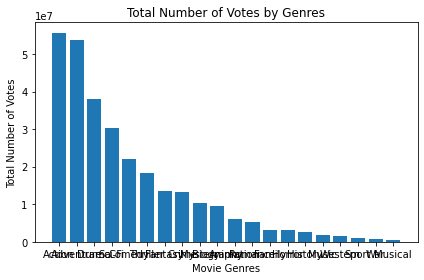

In [53]:
fig, ax = plt.subplots()
x = genres_votes['genres']
y = genres_votes['numvotes']
ax.bar(x,y)
ax.set_xlabel('Movie Genres')
ax.set_ylabel('Total Number of Votes')
ax.set_title("Total Number of Votes by Genres")
plt.tight_layout()